 # Predicting Compressor and Turbine Decay of Naval Vessel

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data

In [2]:
df = pd.read_csv('E:\\naval vessel data.csv')

In [3]:
df

,index,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,11929,5.140,15,21624.934,1924.342,8470.013,175.239,175.239,681.658,288,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.00,1.000
11930,11930,6.175,18,29763.213,2306.745,8800.352,245.954,245.954,747.405,288,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.00,1.000
11931,11931,7.148,21,39003.867,2678.052,9120.889,332.389,332.389,796.457,288,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.00,1.000
11932,11932,8.206,24,50992.579,3087.434,9300.274,438.024,438.024,892.945,288,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.00,1.000


The dataset contains 19 columns.
Therefore there are 1 index column 16 input features and 2 output variables present in the dataset.

# Gathering info and cleaning data

In [4]:
df.isnull().sum()

index                                                       0
Lever position                                              0
Ship speed (v)                                              0
Gas Turbine (GT) shaft torque (GTT) [kN m]                  0
GT rate of revolutions (GTn) [rpm]                          0
Gas Generator rate of revolutions (GGn) [rpm]               0
Starboard Propeller Torque (Ts) [kN]                        0
Port Propeller Torque (Tp) [kN]                             0
Hight Pressure (HP) Turbine exit temperature (T48) [C]      0
GT Compressor inlet air temperature (T1) [C]                0
GT Compressor outlet air temperature (T2) [C]               0
HP Turbine exit pressure (P48) [bar]                        0
GT Compressor inlet air pressure (P1) [bar]                 0
GT Compressor outlet air pressure (P2) [bar]                0
GT exhaust gas pressure (Pexh) [bar]                        0
Turbine Injecton Control (TIC) [%]                          0
Fuel flo

In [5]:
df.describe()

,index,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5966.500000,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,3445.193391,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.533635e-13,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,0.000000,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,2983.250000,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5966.500000,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,8949.750000,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,11933.000000,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   index                                                     11934 non-null  int64  
 1   Lever position                                            11934 non-null  float64
 2   Ship speed (v)                                            11934 non-null  int64  
 3   Gas Turbine (GT) shaft torque (GTT) [kN m]                11934 non-null  float64
 4   GT rate of revolutions (GTn) [rpm]                        11934 non-null  float64
 5   Gas Generator rate of revolutions (GGn) [rpm]             11934 non-null  float64
 6   Starboard Propeller Torque (Ts) [kN]                      11934 non-null  float64
 7   Port Propeller Torque (Tp) [kN]                           11934 non-null  float64
 8   Hight Pressure (

Since from .describe() function all the values in column ['GT Compressor inlet air temperature (T1) [C]'] & ['GT Compressor inlet air pressure (P1) [bar]'] are same we use .drop() function to drop those two columns as the output labels doesn't depend on these two input features as they remain constant

In [7]:
df['GT Compressor inlet air temperature (T1) [C]\xa0 '].value_counts()

288    11934
Name: GT Compressor inlet air temperature (T1) [C]  , dtype: int64

In [8]:
df['GT Compressor inlet air pressure (P1) [bar]\xa0 '].value_counts()

0.998    11934
Name: GT Compressor inlet air pressure (P1) [bar]  , dtype: int64

In [9]:
#Dropimg two coloms containing unique values
df = df.drop(['GT Compressor inlet air temperature (T1) [C]\xa0 ','GT Compressor inlet air pressure (P1) [bar]\xa0 '],axis=1)

In [10]:
df

,index,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,550.563,1.096,5.947,1.019,7.137,0.082,0.95,0.975
1,1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287,0.95,0.975
2,2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,587.587,1.389,7.574,1.020,13.086,0.259,0.95,0.975
3,3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,613.851,1.658,9.007,1.022,18.109,0.358,0.95,0.975
4,4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,645.642,2.078,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,11929,5.140,15,21624.934,1924.342,8470.013,175.239,175.239,681.658,628.950,2.087,10.990,1.027,23.803,0.471,1.00,1.000
11930,11930,6.175,18,29763.213,2306.745,8800.352,245.954,245.954,747.405,658.853,2.512,13.109,1.031,32.671,0.647,1.00,1.000
11931,11931,7.148,21,39003.867,2678.052,9120.889,332.389,332.389,796.457,680.393,2.982,15.420,1.036,42.104,0.834,1.00,1.000
11932,11932,8.206,24,50992.579,3087.434,9300.274,438.024,438.024,892.945,722.029,3.594,18.293,1.043,58.064,1.149,1.00,1.000


# Visualizations

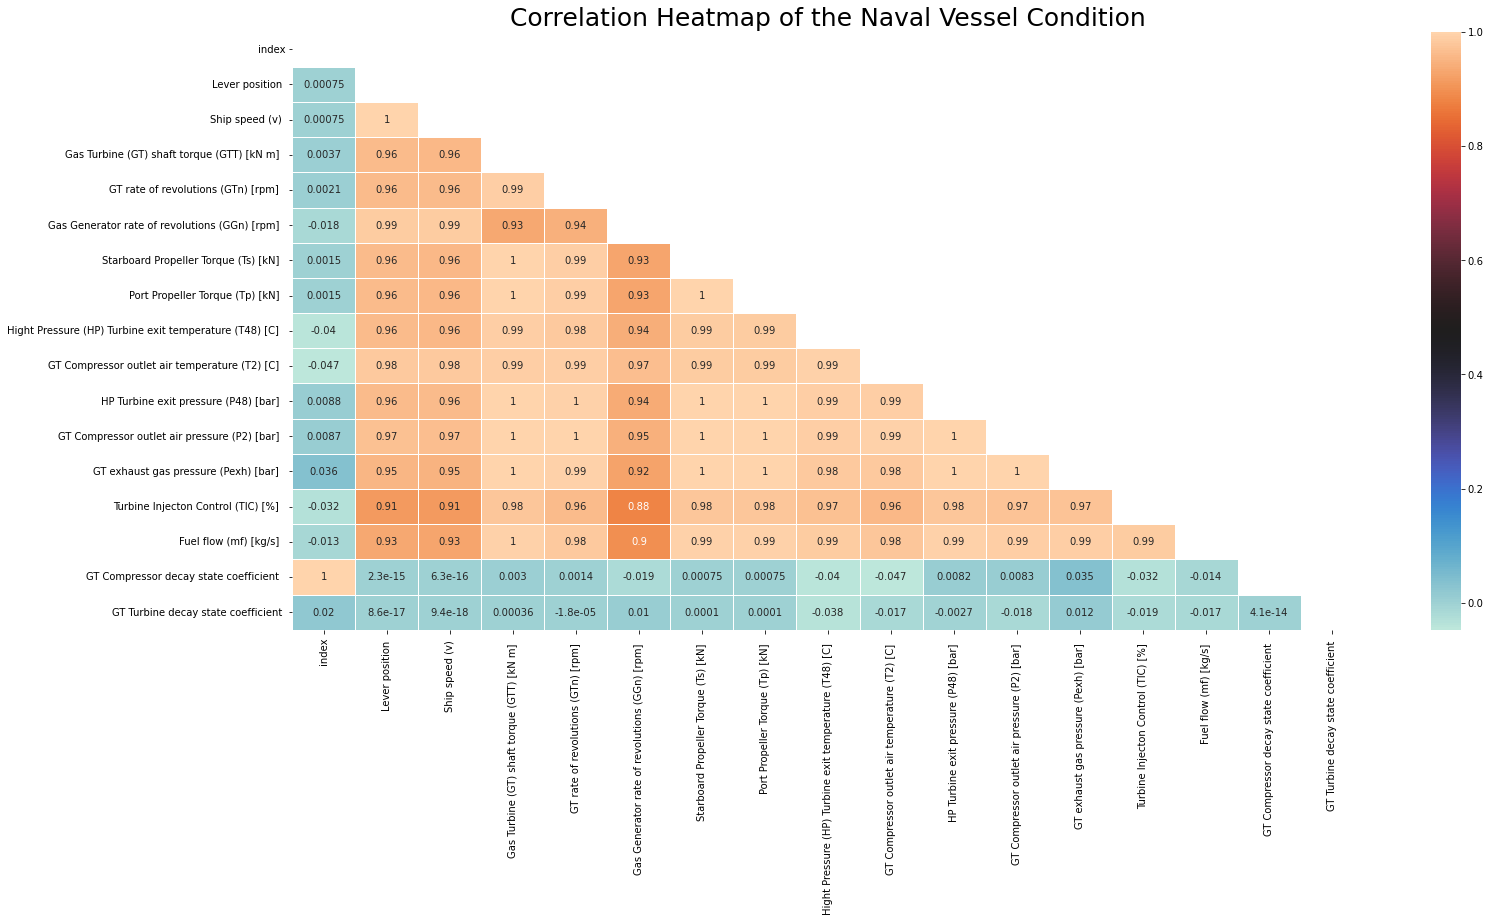

In [11]:
# Creating a heatmap 
# because here to plot large number of data
# First create a space for the heatmap and then draw the heatmap inside the space

fig, ax = plt.subplots(figsize = (24,11))

# Title for the heatmap
title = 'Correlation Heatmap of the Naval Vessel Condition'
plt.title(title,fontsize = 25)

# We will use the variable called mask to remove the values across the heatmap diagonally as it will be the same
mask = np.triu(np.ones_like(df.corr()))

# Correlation heatmap using .heatmap() function of sns library
sns.heatmap(df.corr(), cbar = True, cmap = 'icefire', annot = True, linewidth = 1, ax = ax, mask = mask)

# Enable visualization using .show() function of matplotlib
plt.show()

 There exists a very strong positive correlation among all the input features
As you can see most of the input features have a correlation value of 0.97 and above
 This means that when an input feature increases by one unit the correlated feature corresponding to   that input feature also increases by one unit
These input correlations will be useful in finetuning the base model in the future in the form of     interaction terms
Both the output labels have almost no correlation with any of the input features

# Import new Dataset

To make the indexing of columns easier we have changed the names of column into simplified terms so that it can be called easily in future

In [20]:
# Importing the New Dataset using .read_excel() function of pandas
# We will call the dataset as 'ns'
df = pd.read_excel('E:\\naval data.xlsx\\naval data.xlsx')

In [21]:
df

,index,Lever position,Ship speed (v),GTT,GTn,GGn,Ts,Tp,HP,T1,T2,P48,P1,P2,Pexh,TIC,mf,Compressor DSC,Turbine DSC
0,0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,11929,5.140,15,21624.934,1924.342,8470.013,175.239,175.239,681.658,288,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.00,1.000
11930,11930,6.175,18,29763.213,2306.745,8800.352,245.954,245.954,747.405,288,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.00,1.000
11931,11931,7.148,21,39003.867,2678.052,9120.889,332.389,332.389,796.457,288,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.00,1.000
11932,11932,8.206,24,50992.579,3087.434,9300.274,438.024,438.024,892.945,288,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.00,1.000


In [22]:
# Using .drop() function of pandas to drop out the two columns as we did earlier in the dataframe 'df'
df = df.drop(['T1','P1'], axis = 1)
df.head()

,index,Lever position,Ship speed (v),GTT,GTn,GGn,Ts,Tp,HP,T2,P48,P2,Pexh,TIC,mf,Compressor DSC,Turbine DSC
0,0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,550.563,1.096,5.947,1.019,7.137,0.082,0.95,0.975
1,1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287,0.95,0.975
2,2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,587.587,1.389,7.574,1.020,13.086,0.259,0.95,0.975
3,3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,613.851,1.658,9.007,1.022,18.109,0.358,0.95,0.975
4,4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,645.642,2.078,11.197,1.026,26.373,0.522,0.95,0.975


# Model 1: Predicting GT Compressor decay state coefficient 

Train Test Split

Whenever we are buliding the model, we will perform a train-test split on the dataset. The train data will be used for building the model and the test data will be used to evaluate the fit or accuracy of the model.

In [24]:
# Defining features and labels
X = df.drop(['Compressor DSC','Turbine DSC','index'],axis=1)

y = df['Compressor DSC']

In [25]:
# Importing train test split from scikit learn library
from sklearn.model_selection import train_test_split

In [26]:
# Splitting the dataset using the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [28]:
# Importing LinearRegression model from scikit learn library
from sklearn.linear_model import LinearRegression

In [29]:
# Creating an instance of a LinearRegression() model named lm
lr = LinearRegression()

In [31]:
# Fitting the lm model with training set
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
# Predicting the y values by using the .predict() function
pred = lr.predict(X_test)

In [37]:
# Printing out the coefficients of the model
print('Coeffiecients: \n',lr.coef_)

Coeffiecients: 
 [ 2.57378580e-01 -7.53370538e-02 -6.61366876e-07 -3.00260275e-05
  3.09630668e-05 -5.51907164e-04 -5.51907165e-04  1.57572885e-05
 -3.40712518e-03  1.89526852e-01  1.36901934e-02  9.31134160e-01
 -7.33731103e-04  2.17924891e-01]


In [39]:
# Recerating the coefficients of the model as dataframe
coeffecients = pd.DataFrame(lr.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Lever position,2.573786e-01
Ship speed (v),-7.533705e-02
GTT,-6.613669e-07
GTn,-3.002603e-05
GGn,3.096307e-05
Ts,-5.519072e-04
Tp,-5.519072e-04
HP,1.575729e-05
T2,-3.407125e-03
P48,1.895269e-01


In [40]:
# Checking the RMSE and r2_score value between y_test and predicted y_test values
from sklearn import metrics

In [45]:
print('R2 score:', metrics.r2_score(y_test, pred))

R2 score: 0.8401712078374649


Inference from Model 1

The R-squared value is 0.843 which states that about 84.3% of proportion of variability in data can be explained by this linear regression model. The R-squared is the most important parameter for a model evaluation. Higher the value, better is the fit.

# Model 2: Predicting GT Turbine decay state coefficient

1:  Using Linear regresson

In [46]:
# Defining features and labels
X = df.drop(['Compressor DSC','Turbine DSC','index'],axis=1)

y = df['Turbine DSC']

In [47]:
# Importing train test split from scikit learn library
from sklearn.model_selection import train_test_split

In [48]:
# Splitting the dataset using the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [49]:
# Importing LinearRegression model from scikit learn library
from sklearn.linear_model import LinearRegression

In [50]:
# Creating an instance of a LinearRegression() model named lm
lr = LinearRegression()

In [51]:
# Fitting the lm model with training set
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
# Predicting the y values by using the .predict() function
pred = lr.predict(X_test)

In [53]:
# Printing out the coefficients of the model
print('Coeffiecients: \n',lr.coef_)

Coeffiecients: 
 [-7.85152679e-04  6.39772435e-03  1.38866251e-05  6.49894639e-05
  3.12987227e-05 -7.91606506e-04 -7.91606506e-04 -6.84418428e-04
  1.97590549e-04  8.16007917e-02 -5.36570445e-02  8.75707289e-01
 -2.34671697e-04  3.57019785e-01]


In [54]:
# Recerating the coefficients of the model as dataframe
coeffecients = pd.DataFrame(lr.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Lever position,-0.000785
Ship speed (v),0.006398
GTT,0.000014
GTn,0.000065
GGn,0.000031
Ts,-0.000792
Tp,-0.000792
HP,-0.000684
T2,0.000198
P48,0.081601


In [55]:
# Checking the RMSE and r2_score value between y_test and predicted y_test values
from sklearn import metrics

In [56]:
print('R2 score:', metrics.r2_score(y_test, pred))

R2 score: 0.9115660345494668


Inference from Model 2

The R-squared value is 0.911 which states that about 91.1% of proportion of variability in data can be explained by this linear regression model. The R-squared is the most important parameter for a model evaluation. Higher the value, better is the fit.

2:  Using Decision tree

In [74]:
X = df.drop('Turbine DSC', axis=1)
y = df['Turbine DSC']

In [75]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Initialize a decision tree regressor with default hyperparameters
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)

In [77]:
# Train the decision tree on the training set
dt.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [78]:
# Predicting the y values by using the .predict() function
pred = dt.predict(X_test)

In [79]:
# Checking the RMSE and r2_score value between y_test and predicted y_test values
from sklearn import metrics

In [80]:
print('R2 score:', metrics.r2_score(y_test, pred))

R2 score: 0.9830392741861008


The R-squared value is 0.983 which states that about 91.3% of proportion of variability in data can be explained by this Decision tree model. The R-squared is the most important parameter for a model evaluation. Higher the value, better is the fit.